Decision Trees in Python with Scikit-Learn
-------------------------------------------------------------

Introduction
-----------------
A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks. 

For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.

Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:

![decison_tree_image](datasets_n_images/images/decison_tree_image.png 'decison_tree_image')

Advantages of Decision Trees
------------------------------

There are several advantages of using decision treess for predictive analysis:

>1. Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.

>2. They require relatively less effort for training the algorithm.

>3. They can be used to classify non-linearly separable data.

>4. They're very fast and efficient compared to KNN and other classification algorithms.

# 1. Decision Tree for Classification
---------------------------------------------------------

Here, we will predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, kurtosis of the image, entropy, and skewness of the image.

In [2]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
#try %matplotlib notebook

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("./datasets_n_images/datasets_module_4/bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 
#class=0 Not fake
#Class=1 Fake

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
bankdata['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [4]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
import seaborn as sns

<AxesSubplot:>

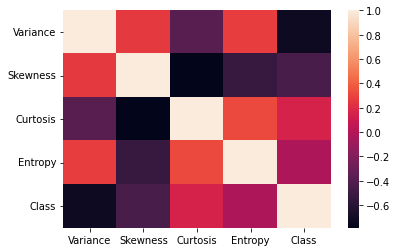

In [6]:
sns.heatmap(bankdata.corr())

In [1]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  

In [7]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels, do :
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']


# the final preprocessing step is to divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)


# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred=classifier.predict(X_test)



# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")  
print("\nclassification_report:\n",classification_report(y_test, y_pred))

# Remember : for evaluating classification-based ML algo use  
# confusion_matrix, classification_report and accuracy_score.
# And for evaluating regression-based ML Algo use Mean Squared Error(MSE), ...

Confusion Matrix:
 [[155   2]
 [  0 118]] 


classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Conclusion : 
Try 1:
From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 2. This is 98.5% accuracy. This will change everytime depending upon weighted avg precision value.
Try 2:
From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 2. This is 99.27% accuracy.

In [10]:
# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  
classifier1 = DecisionTreeClassifier(criterion='entropy',min_samples_split=10)  
classifier1.fit(X_train, y_train)

# make predictions on the test data
y_pred=classifier1.predict(X_test)



# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")  
print("\nclassification_report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[153   4]
 [  1 117]] 


classification_report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.97      0.99      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [11]:
#Loop the above process
from sklearn.model_selection import train_test_split
i=1
x=0.05
test_sz=.85
for i in range(1,10):
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.85-x)


 # Training the Algorithm. Here we would use DecisionTreeClassifier
 from sklearn.tree import DecisionTreeClassifier  
 classifier = DecisionTreeClassifier()  
 classifier.fit(X_train, y_train)

 # make predictions on the test data
 y_pred=classifier.predict(X_test)



 # Evaluating the Algorithm
 from sklearn.metrics import classification_report, confusion_matrix
 print("Iteration",i,":\n")
 print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")  
 print("\nclassification_report:\n",classification_report(y_test, y_pred))
 x=test_sz-0.05

# Remember : for evaluating classification-based ML algo use  
# confusion_matrix, classification_report and accuracy_score.
# And for evaluating regression-based ML Algo use Mean Squared Error(MSE), ...

Iteration 1 :

Confusion Matrix:
 [[592  28]
 [ 38 440]] 


classification_report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       620
           1       0.94      0.92      0.93       478

    accuracy                           0.94      1098
   macro avg       0.94      0.94      0.94      1098
weighted avg       0.94      0.94      0.94      1098

Iteration 2 :

Confusion Matrix:
 [[43  0]
 [ 0 26]] 


classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        26

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Iteration 3 :

Confusion Matrix:
 [[38  0]
 [ 0 31]] 


classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    

# 2. Decision Tree for Regression
------------------------------------------------------

We will petrol_consumption.csv dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

In [4]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing the Dataset
dataset = pd.read_csv('./datasets_n_images/datasets_module_4/petrol_consumption.csv')

dataset.head()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
# To see statistical details of the dataset, execute the following command:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
# Preparing the Data
# divide the data into attributes and labels

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)


# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class , not DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)



# To make predictions on the test set, 
y_pred = regressor.predict(X_test)  

# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
29,534,487.0
4,410,524.0
26,577,566.0
30,571,554.0
32,577,566.0


**Remember : 

that in your case the records compared may be different, depending upon the training and testing split. Since the train_test_split method randomly splits the data we likely won't have the same training and test sets.

In [7]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 40.0
Mean Squared Error: 3147.2
Root Mean Squared Error: 56.09991087336949


The mean absolute error for our algorithm is 56.09, which is less than 10% of 576.77 i.e. 57.677 of all the values in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job. All though getting a value <10% would have been better.

In [8]:
# necessary imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# loading the dataset
dataset = pd.read_csv('./datasets_n_images/datasets_module_4/petrol_consumption.csv')

dataset.head() 

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [11]:
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) #default tset_size=0.25,
                                                                                            #random_state=seedvalue

# Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = regressor.predict(X_test)  

# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
29,534,468.446949
4,410,550.475773
26,577,589.922533
30,571,572.151628
32,577,648.442611
37,704,645.441003
34,487,517.913312
40,587,669.802235
7,467,499.668226
10,580,496.656659


In [14]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 47.71470395631454
Mean Squared Error: 3307.8706639672964
Root Mean Squared Error: 57.51409100357317
